In [7]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from xlrd import open_workbook, cellname

In [2]:
def read_workbook(file_path):
    wb = open_workbook(file_path)
    sheet = wb.sheet_by_index(0)
    dates = []
    temps = []
    for row_index in range(sheet.nrows)[1:]:
        dates.append(sheet.cell(row_index, 0).value)
        temps.append(sheet.cell(row_index, 1).value)
    return dates, temps

dates, temps = read_workbook("LongBeachTemperatures.xls")

['2020-06-01T00:00:00', '2020-06-02T00:00:00', '2020-06-03T00:00:00', '2020-06-04T00:00:00', '2020-06-05T00:00:00', '2020-06-06T00:00:00', '2020-06-07T00:00:00', '2020-06-08T00:00:00', '2020-06-09T00:00:00', '2020-06-10T00:00:00', '2020-06-11T00:00:00', '2020-06-12T00:00:00', '2020-06-13T00:00:00', '2020-06-14T00:00:00', '2020-06-15T00:00:00', '2020-06-16T00:00:00', '2020-06-17T00:00:00', '2020-06-18T00:00:00', '2020-06-19T00:00:00', '2020-06-20T00:00:00', '2020-06-21T00:00:00', '2020-06-22T00:00:00', '2020-06-23T00:00:00', '2020-06-24T00:00:00', '2020-06-25T00:00:00', '2020-06-26T00:00:00', '2020-06-27T00:00:00', '2020-06-28T00:00:00', '2020-06-29T00:00:00', '2020-06-30T00:00:00']
[68.72, 69.25999999999999, 72.32, 66.74000000000001, 65.84, 66.74000000000001, 66.56, 71.42, 79.34, 78.44, 75.02, 67.46000000000001, 66.92, 67.46000000000001, 68.0, 66.38, 67.28, 64.03999999999999, 67.46000000000001, 66.56, 67.64, 68.18, 66.56, 67.64, 66.92, 68.18, 67.82, 67.1, 66.92, 68.18]


In [4]:
max(temps)

79.34

In [5]:
min(temps)

64.03999999999999

In [9]:
median = np.median(temps)
print(median)

67.46000000000001


In [10]:
avg = np.average(temps)
print(avg)

68.57


In [15]:
pct = np.percentile(temps, 90)
q1 = np.percentile(temps, 25)
q3 = np.percentile(temps, 75)
print("25th percentile is {} and 75th percentile is {}".format(q1, q3))

25th percentile is 66.78500000000001 and 75th percentile is 68.18


In [16]:
stdev = np.std(temps)
print(stdev)

3.4061033454667804


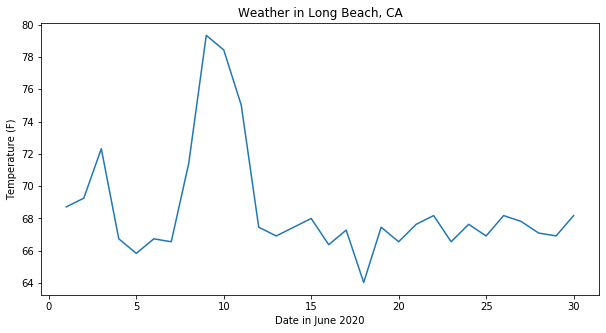

In [26]:
def plot_data(dates, temps):
    fig = plt.figure(figsize=(10, 5))
    plt.plot(range(1,31), temps)
    plt.xlabel("Date in June 2020")
    plt.ylabel("Temperature (F)")
    plt.title("Weather in Long Beach, CA")
    plt.show()
    
    
plot_data(dates, temps)   

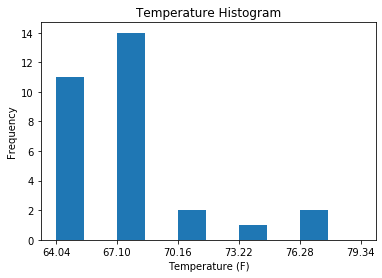

In [36]:
def histogram(temps):
    fig, ax = plt.subplots()
    freq, bin_edges, _ = ax.hist(temps, width = 1.4, bins=5)
    
    ax.set_xticks(bin_edges)
    ax.set_ylabel("Frequency")
    ax.set_xlabel("Temperature (F)")
    ax.set_title("Temperature Histogram")

histogram(temps)

In [54]:
def read_data(file_path):
    data = list(csv.DictReader(open(file_path)))
    return data
squirrel_data = read_data("2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv")
print(squirrel_data[:1])

[OrderedDict([('X', '-73.9561344937861'), ('Y', '40.7940823884086'), ('Unique Squirrel ID', '37F-PM-1014-03'), ('Hectare', '37F'), ('Shift', 'PM'), ('Date', '10142018'), ('Hectare Squirrel Number', '3'), ('Age', ''), ('Primary Fur Color', ''), ('Highlight Fur Color', ''), ('Combination of Primary and Highlight Color', '+'), ('Color notes', ''), ('Location', ''), ('Above Ground Sighter Measurement', ''), ('Specific Location', ''), ('Running', 'false'), ('Chasing', 'false'), ('Climbing', 'false'), ('Eating', 'false'), ('Foraging', 'false'), ('Other Activities', ''), ('Kuks', 'false'), ('Quaas', 'false'), ('Moans', 'false'), ('Tail flags', 'false'), ('Tail twitches', 'false'), ('Approaches', 'false'), ('Indifferent', 'false'), ('Runs from', 'false'), ('Other Interactions', ''), ('Lat/Long', 'POINT (-73.9561344937861 40.7940823884086)'), ('Zip Codes', ''), ('Community Districts', '19'), ('Borough Boundaries', '4'), ('City Council Districts', '19'), ('Police Precincts', '13')])]


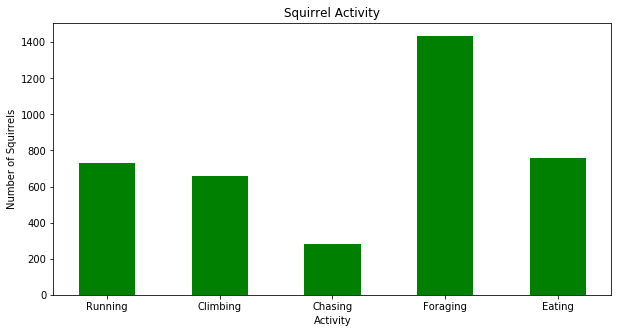

In [44]:
def graph_data(data):
    activities = ["Running" , "Chasing", "Climbing", "Eating", "Foraging"]
    totals = {}
    
    for item in data:
        for activity in activities:
            if item[activity] == "true":
                totals[activity] = totals.get(activity, 0) + 1
    
    plt.figure(figsize=(10,5))
    plt.bar(totals.keys(), totals.values(), color="green", width=0.5)
    plt.xlabel("Activity")
    plt.ylabel("Number of Squirrels")
    plt.title("Squirrel Activity")
    plt.show()
    
graph_data(squirrel_data)

[0 1 2]


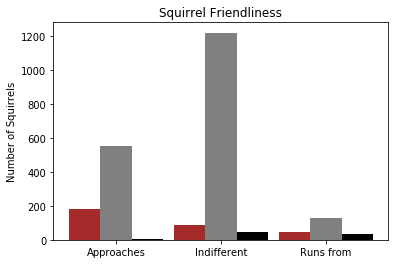

In [53]:
def graph_colors(data):
    behaviors = ["Approaches", "Indifferent", "Runs from"]
    cinnamon = {}
    gray = {}
    black = {}
    
    for item in data:
        for behavior in behaviors:
            fur_color = item["Primary Fur Color"]
            if item[behavior] == "true":
                if fur_color == "Cinnamon":
                    cinnamon[behavior] = cinnamon.get(behavior, 0) + 1
                elif fur_color == "Gray":
                    gray[behavior] = gray.get(behavior, 0) + 1
                elif fur_color == "Black":
                    black[behavior] = black.get(behavior, 0) + 1
    
    x = np.arange(len(cinnamon.keys()))
    print(x)
    width = 0.3
    
    fig, ax = plt.subplots()
    ax.bar(x, gray.values(),width, color="gray")
    ax.bar(x - width, cinnamon.values(), width, color="brown")
    ax.bar(x + width, black.values(), width, color="black")
    
    ax.set_ylabel("Number of Squirrels")
    ax.set_xticks(x)
    ax.set_xticklabels(behaviors)
    ax.set_title("Squirrel Friendliness")
    
graph_colors(squirrel_data)